In [1]:
# @title Java H20 Installation { form-width: "100px", display-mode: "form" }
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 38 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

In [2]:
# @title Python Package Installation { display-mode: "form" }
! pip install h2o
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 8.2 MB/s eta 0:00:00


In [41]:
import h2o
from h2o.automl import H2OAutoML
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [3]:
h2o.init()

data = pd.read_csv("https://raw.githubusercontent.com/ChandrasekaranN/INFO-DSE/main/games.csv")

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp1diol3lx
  JVM stdout: /tmp/tmp1diol3lx/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp1diol3lx/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_tlzwzu
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [4]:
data.drop(["title", "date_release", "date"], axis = 1, inplace=True)

In [5]:
ratings_map = {
    "Overwhelmingly Positive" : 9,
    "Mostly Positive" : 8,
    "Very Positive" : 7,
    "Positive" : 6,
    "Mixed" : 5,
    "Negative" : 4,
    "Very Negative" : 3,
    "Mostly Negative" : 2,
    "Overwhelmingly Negative" : 1
}

In [6]:
data['rating'] = data['rating'].map(ratings_map)

In [7]:
data['win'] = data['win'].astype(int)
data['mac'] = data['mac'].astype(int)
data['linux'] = data['linux'].astype(int)

In [8]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

X = data.columns.to_list()
y = "is_recommended"

In [9]:
X.remove("steam_deck")
X.remove("is_recommended")
X

['app_id',
 'win',
 'mac',
 'linux',
 'rating',
 'positive_ratio',
 'user_reviews',
 'price_final',
 'price_original',
 'discount',
 'helpful',
 'funny',
 'hours',
 'user_id',
 'review_id']

## Linear Regression

In [10]:
lm = LinearRegression()
lm.fit(train[X], train[y])

print("Linear Regression Coefficients:")
for coef, feature in zip(lm.coef_, X):
    print(f"{feature}: {coef}")

Linear Regression Coefficients:
app_id: 9.391113798513485e-09
win: -0.0923365915161263
mac: 0.004361313586972528
linux: 0.005664529726946073
rating: 0.0034057854688387
positive_ratio: 0.008886163544402307
user_reviews: -1.1594541322320706e-07
price_final: -0.001088721034397394
price_original: 0.001043407311886864
discount: -0.0007056874004579605
helpful: -0.0002258611692353557
funny: 0.00023985325205480563
hours: 0.00037273470280704677
user_id: -2.241121555696113e-09
review_id: 4.791207985910262e-10


In [29]:
explainer = shap.Explainer(lm.predict, train[X])
shap_values_linear = explainer(test[X])

PermutationExplainer explainer: 7505it [07:45, 15.78it/s]                          


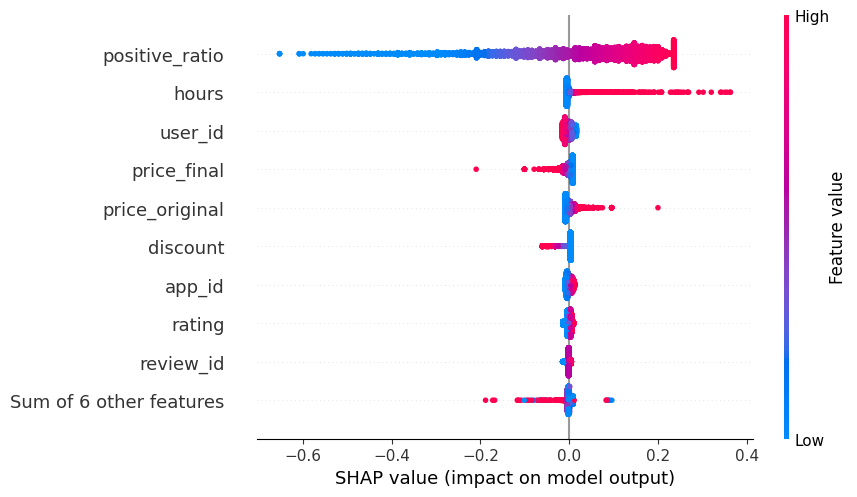

In [30]:
shap.plots.beeswarm(shap_values_linear)

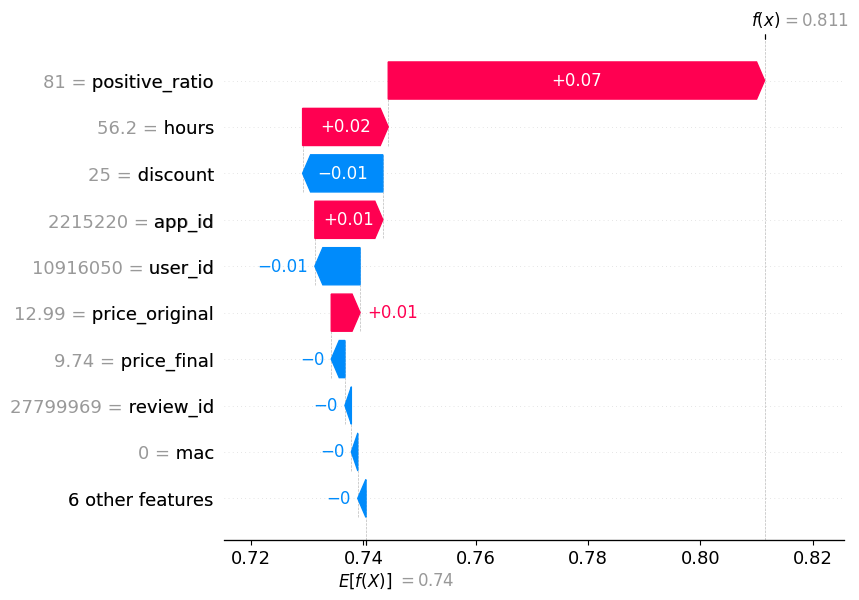

In [36]:
shap.plots.waterfall(shap_values_linear[0])

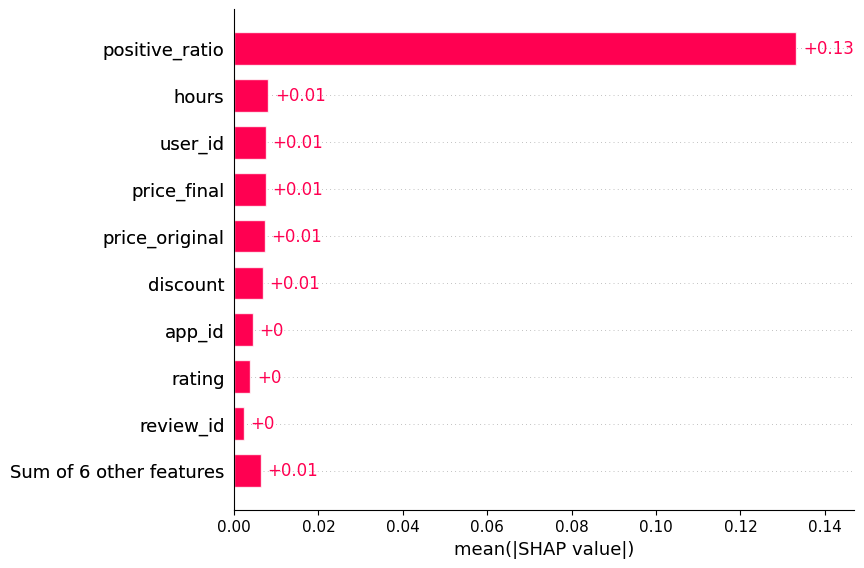

In [37]:
shap.plots.bar(shap_values_linear)

## Decision Tree

In [11]:
dt = DecisionTreeRegressor()
dt.fit(train[X], train[y])

DecisionTreeRegressor()

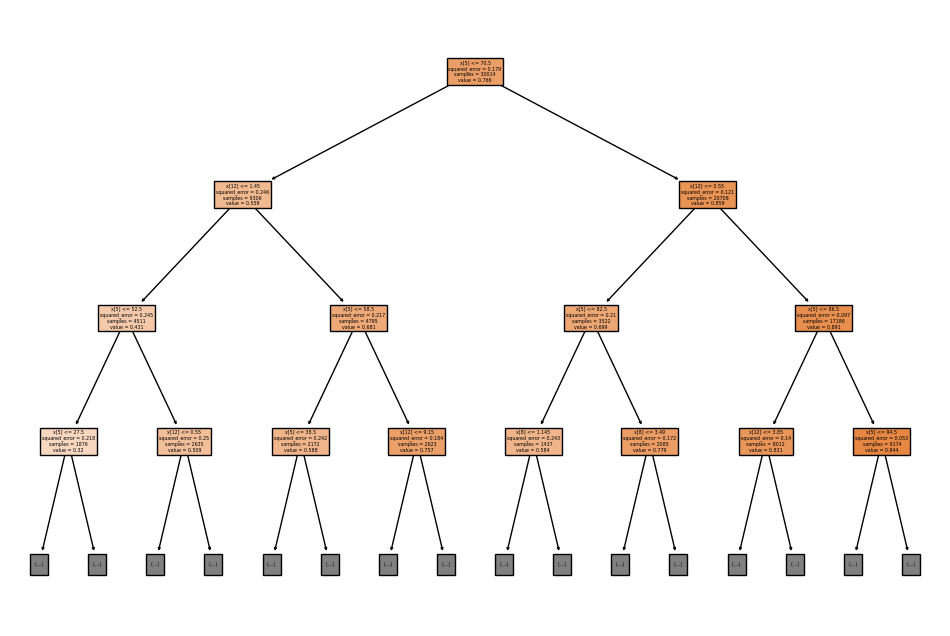

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(dt, max_depth=3, filled=True)
plt.show()

In [22]:
explainer = shap.Explainer(dt.predict, train[X])
shap_values_tree = explainer(test[X])

PermutationExplainer explainer: 7505it [06:18, 19.59it/s]


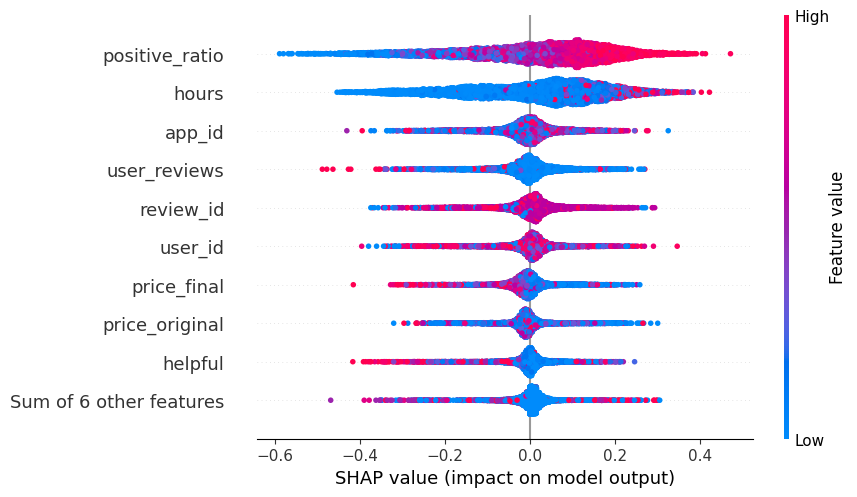

In [23]:
shap.plots.beeswarm(shap_values_tree)

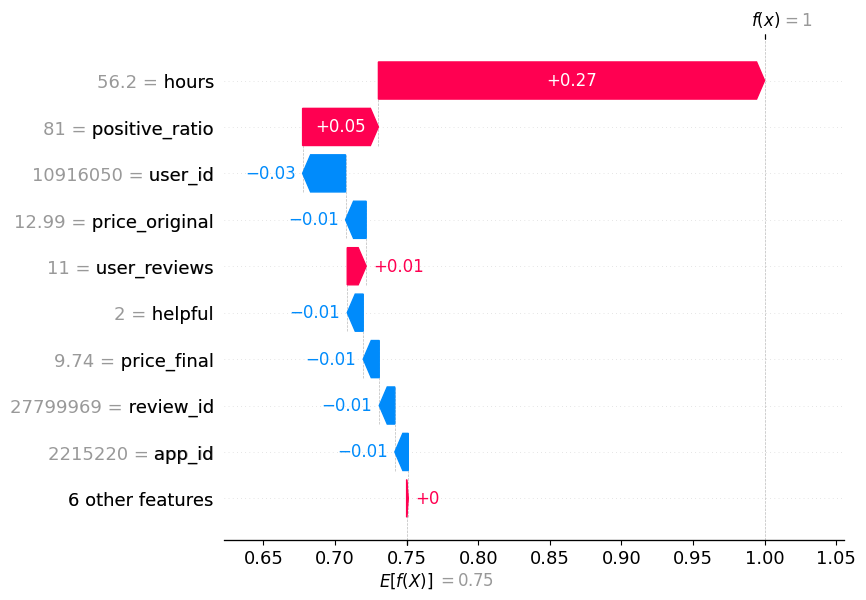

In [38]:
shap.plots.waterfall(shap_values_tree[0])

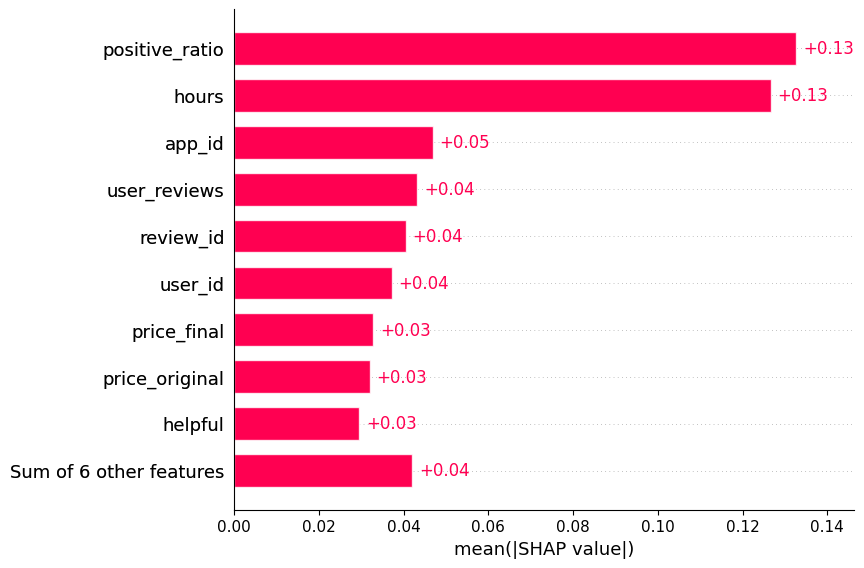

In [39]:
shap.plots.bar(shap_values_tree)

## AutoML Model

In [15]:
h2o_df = h2o.H2OFrame(data)

train_h2o, test_h2o = h2o_df.split_frame(ratios=[0.8], seed=42)

aml = H2OAutoML(max_models=10, seed=42)
aml.train(x=X, y=y, training_frame=train_h2o)

best_model = aml.leader

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_1_20240318_05954,0.810871,0.422451,0.928529,0.349165,0.367706,0.135207,18400,0.21445,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20240318_05954,0.808596,0.424468,0.927821,0.349606,0.368841,0.136044,18714,0.112841,StackedEnsemble
GBM_2_AutoML_1_20240318_05954,0.808074,0.424937,0.927927,0.389989,0.369136,0.136261,2358,0.023814,GBM
XGBoost_3_AutoML_1_20240318_05954,0.807466,0.42576,0.926742,0.379405,0.369392,0.13645,1879,0.019119,XGBoost
GBM_1_AutoML_1_20240318_05954,0.804507,0.428001,0.925658,0.379126,0.370569,0.137321,8000,0.03262,GBM
GBM_3_AutoML_1_20240318_05954,0.80323,0.429332,0.925805,0.380022,0.371172,0.137768,2656,0.053423,GBM
GBM_4_AutoML_1_20240318_05954,0.80212,0.430675,0.925685,0.391869,0.371835,0.138262,2521,0.019669,GBM
XGBoost_2_AutoML_1_20240318_05954,0.796622,0.440211,0.922231,0.38812,0.375813,0.141235,2870,0.021296,XGBoost
XRT_1_AutoML_1_20240318_05954,0.794417,0.43661,0.920104,0.414538,0.374227,0.140046,8048,0.065995,DRF
XGBoost_1_AutoML_1_20240318_05954,0.788911,0.448562,0.917681,0.403268,0.378695,0.14341,3888,0.033577,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20240318_05954

,False,True,Error,Rate
False,610.0,1114.0,0.6462,(1114.0/1724.0)
True,296.0,5379.0,0.0522,(296.0/5675.0)
Total,906.0,6493.0,0.1906,(1410.0/7399.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

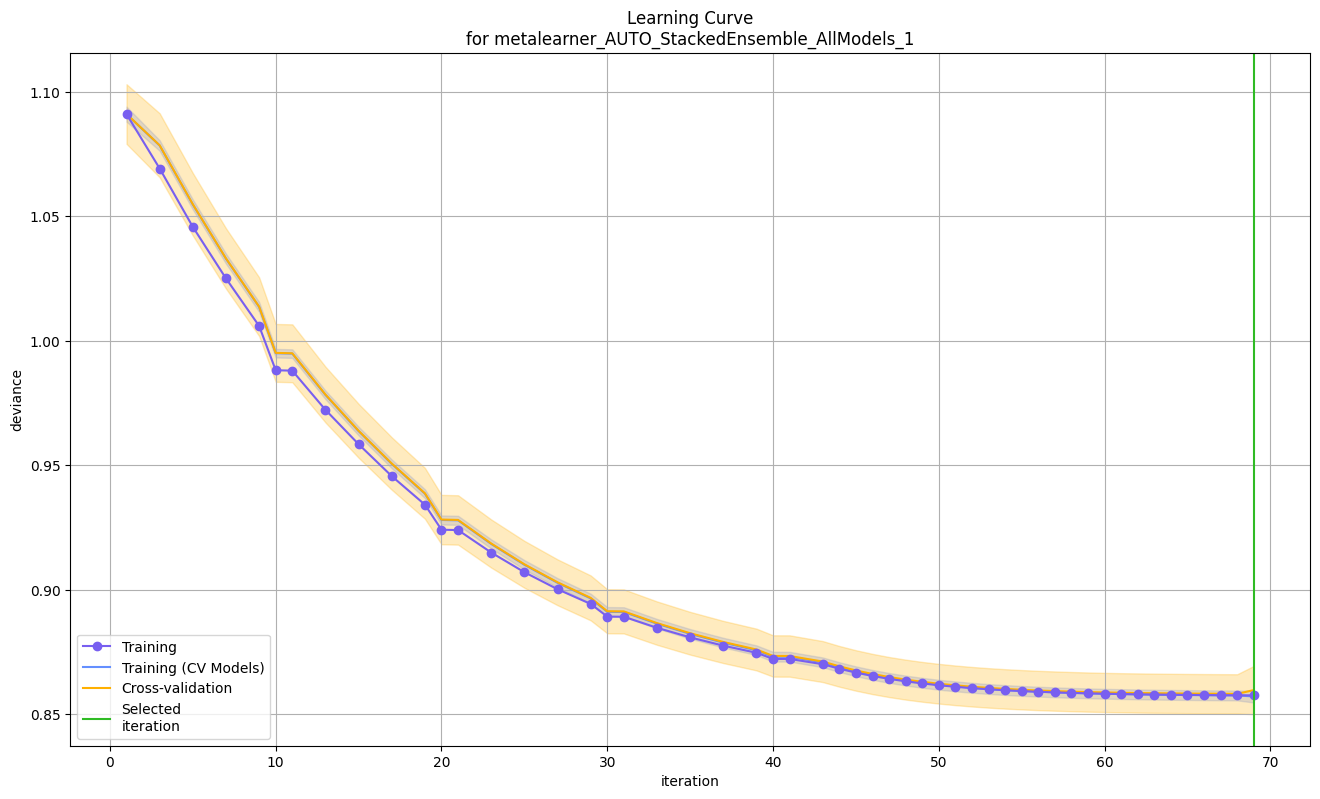

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

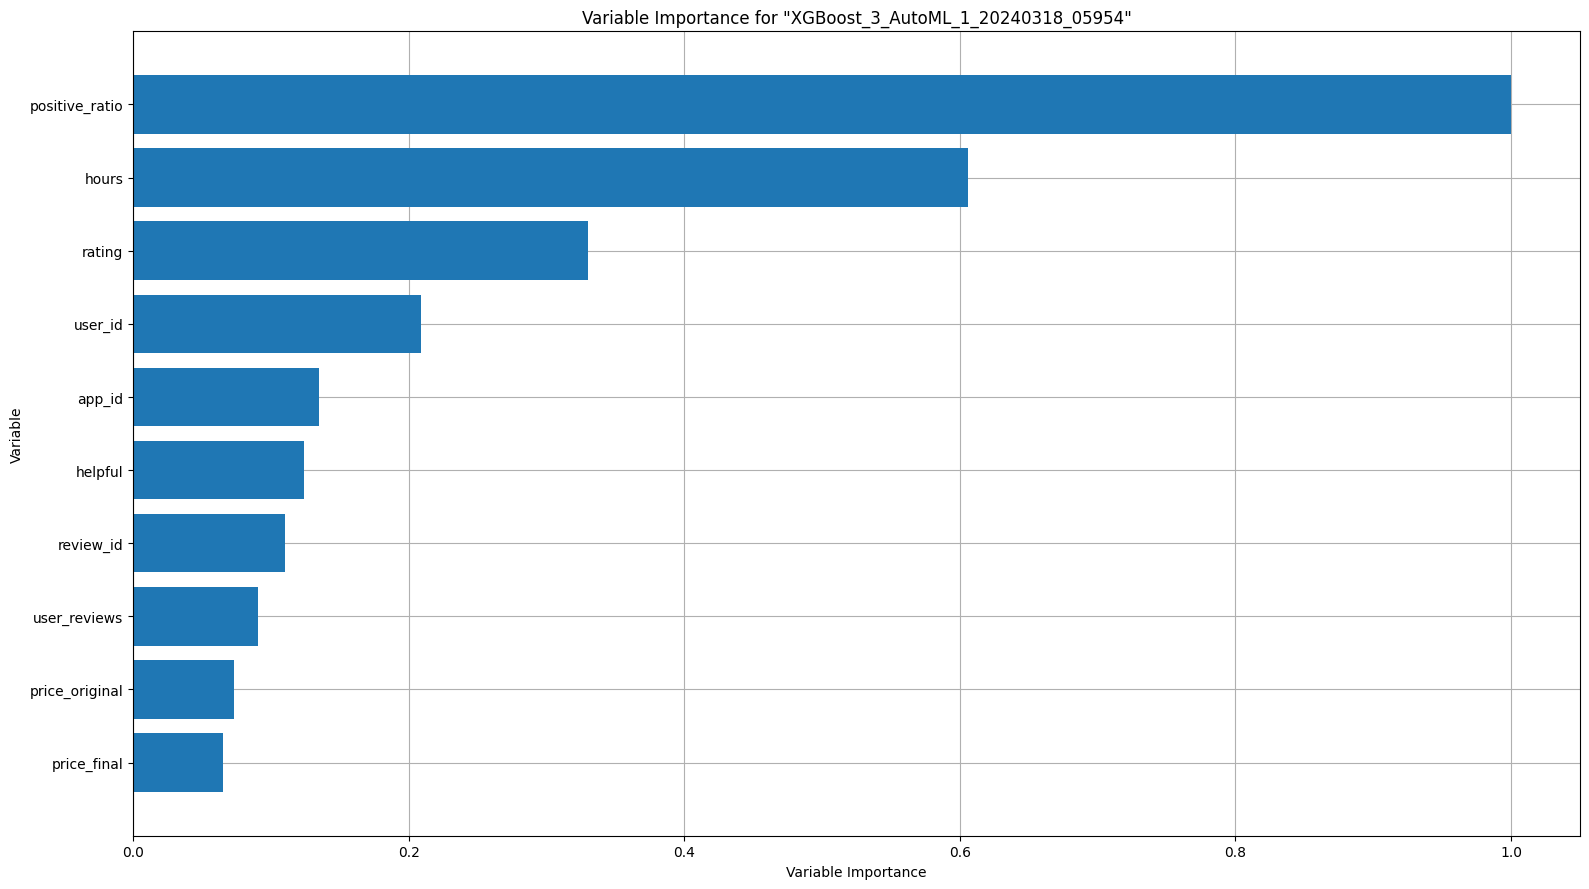

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

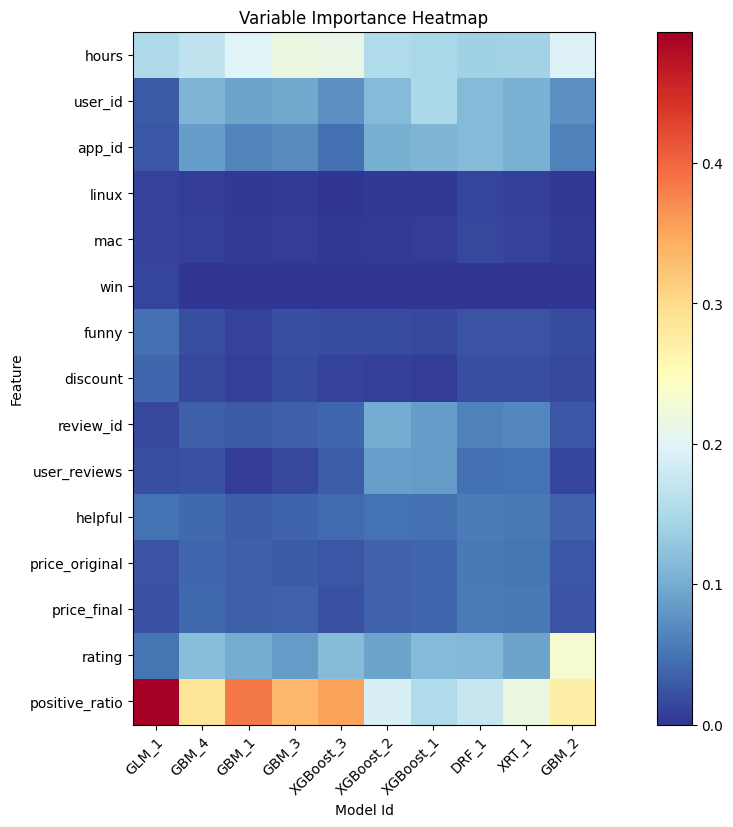

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

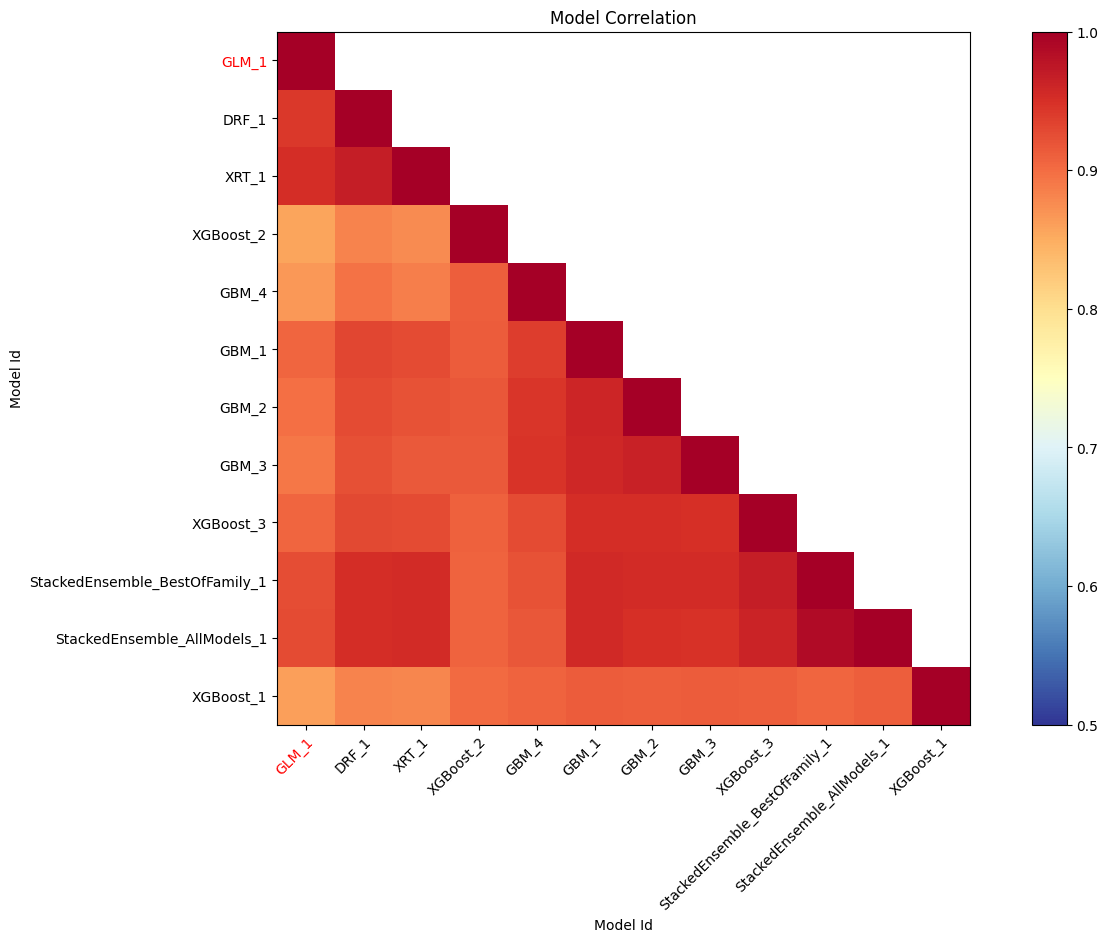

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

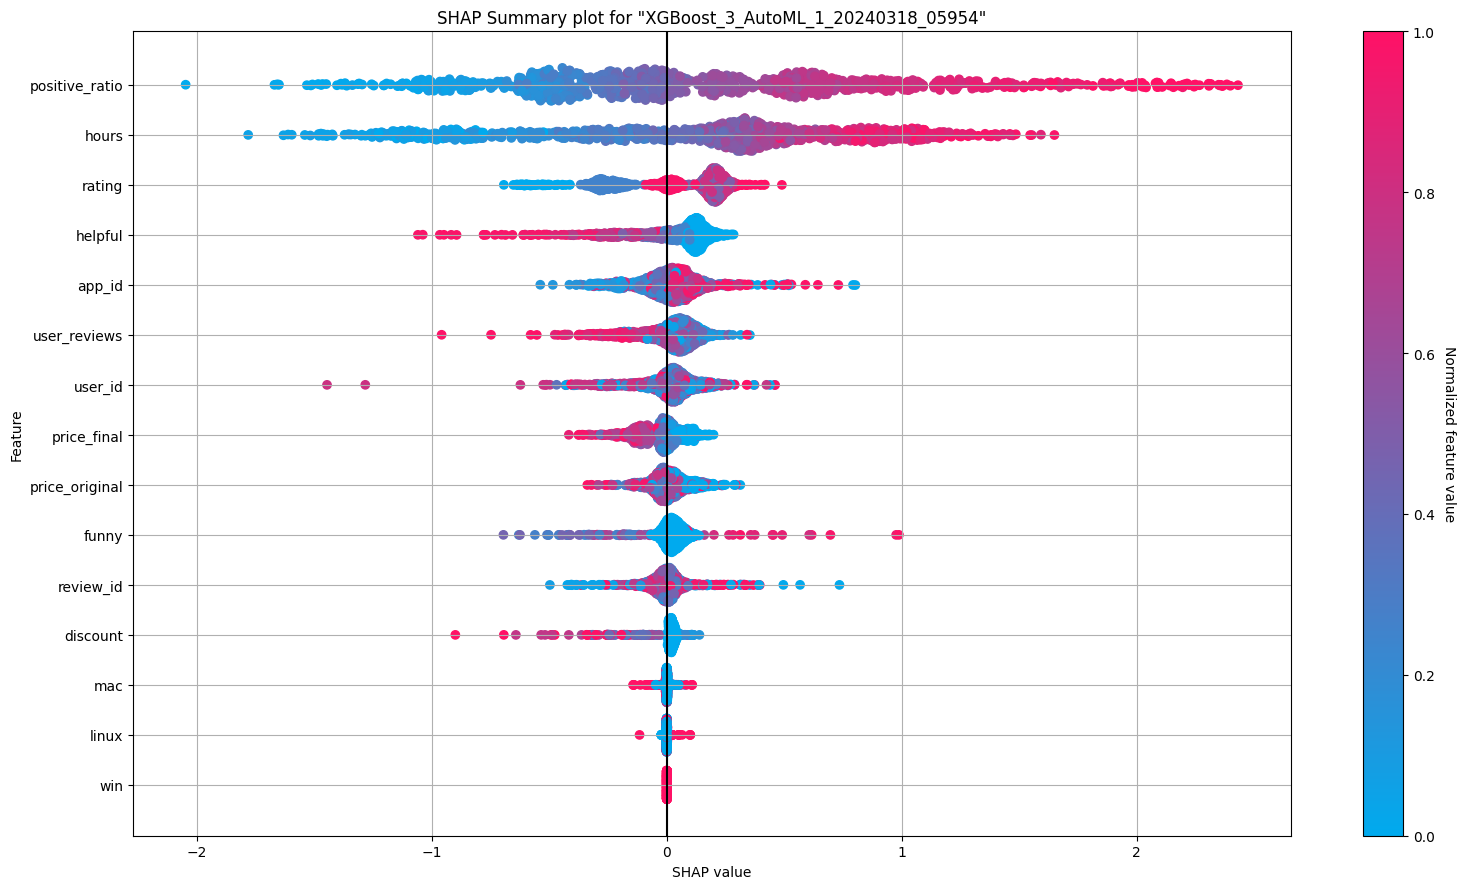

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

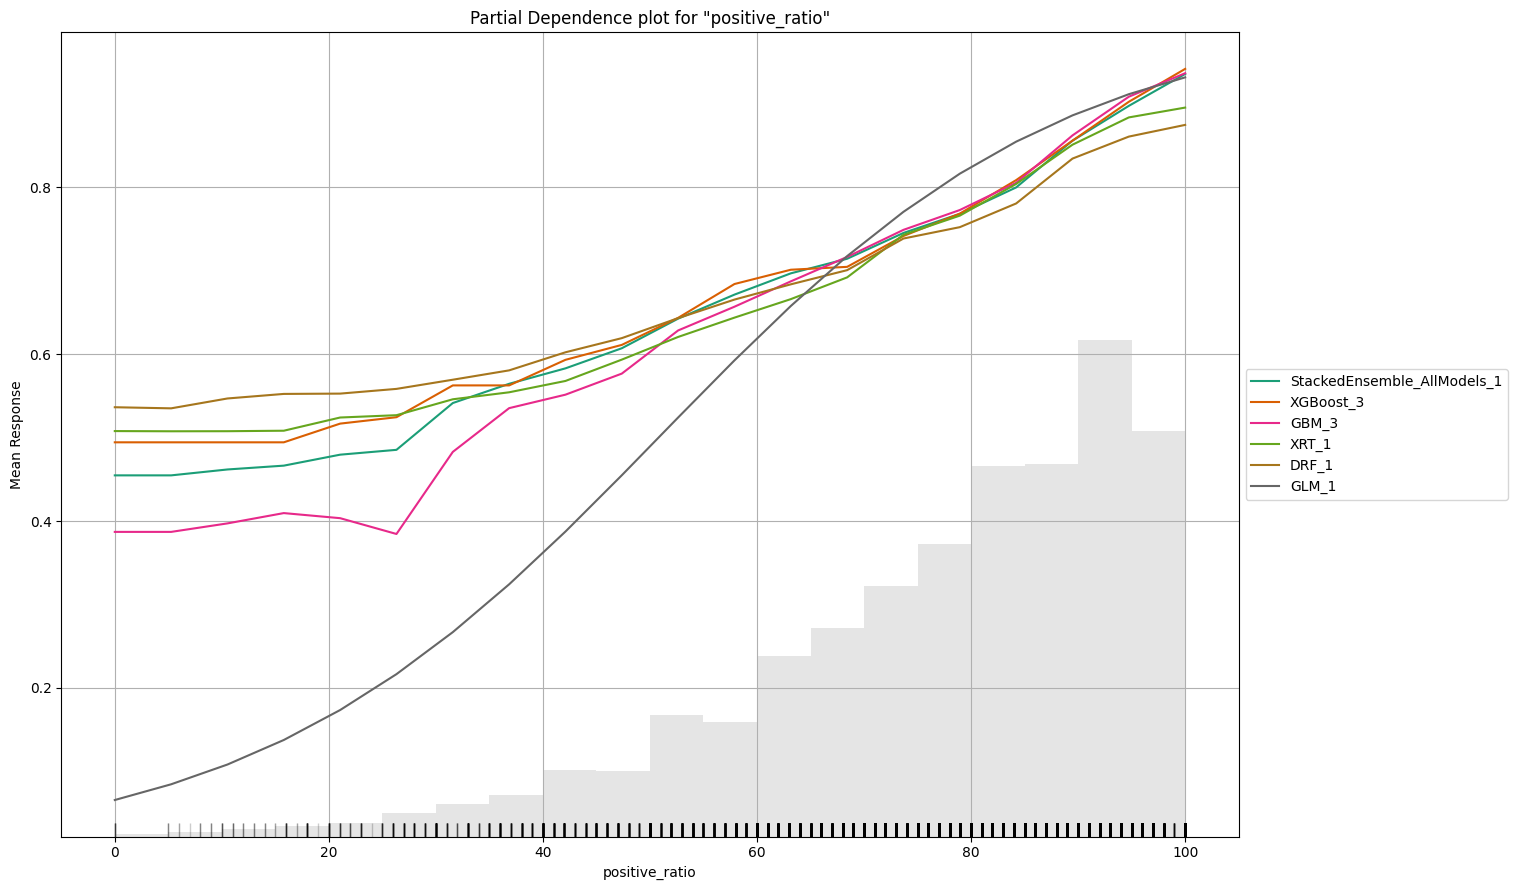

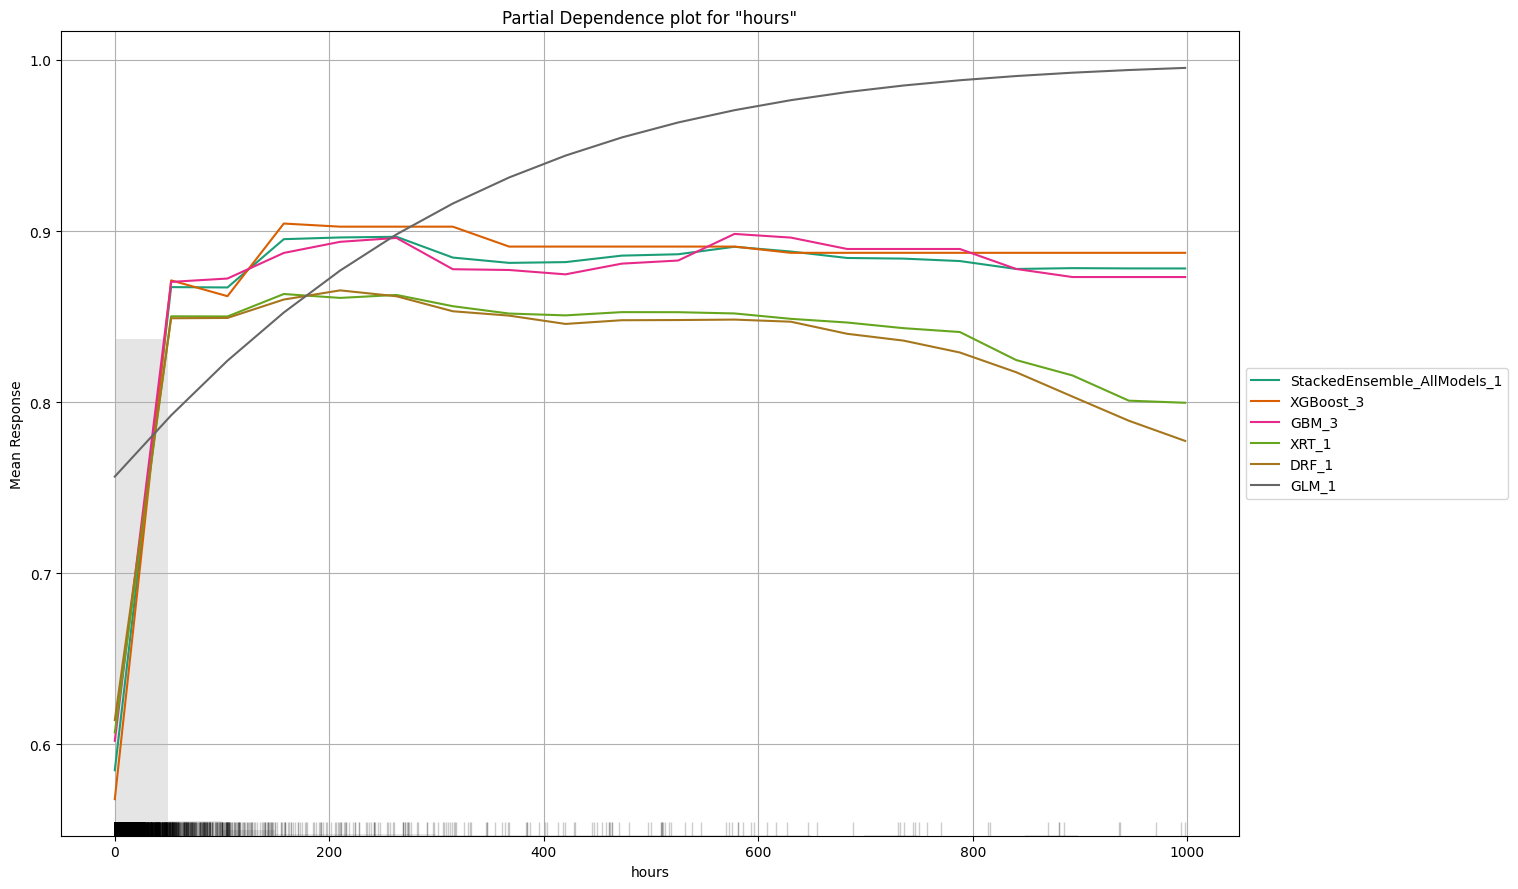

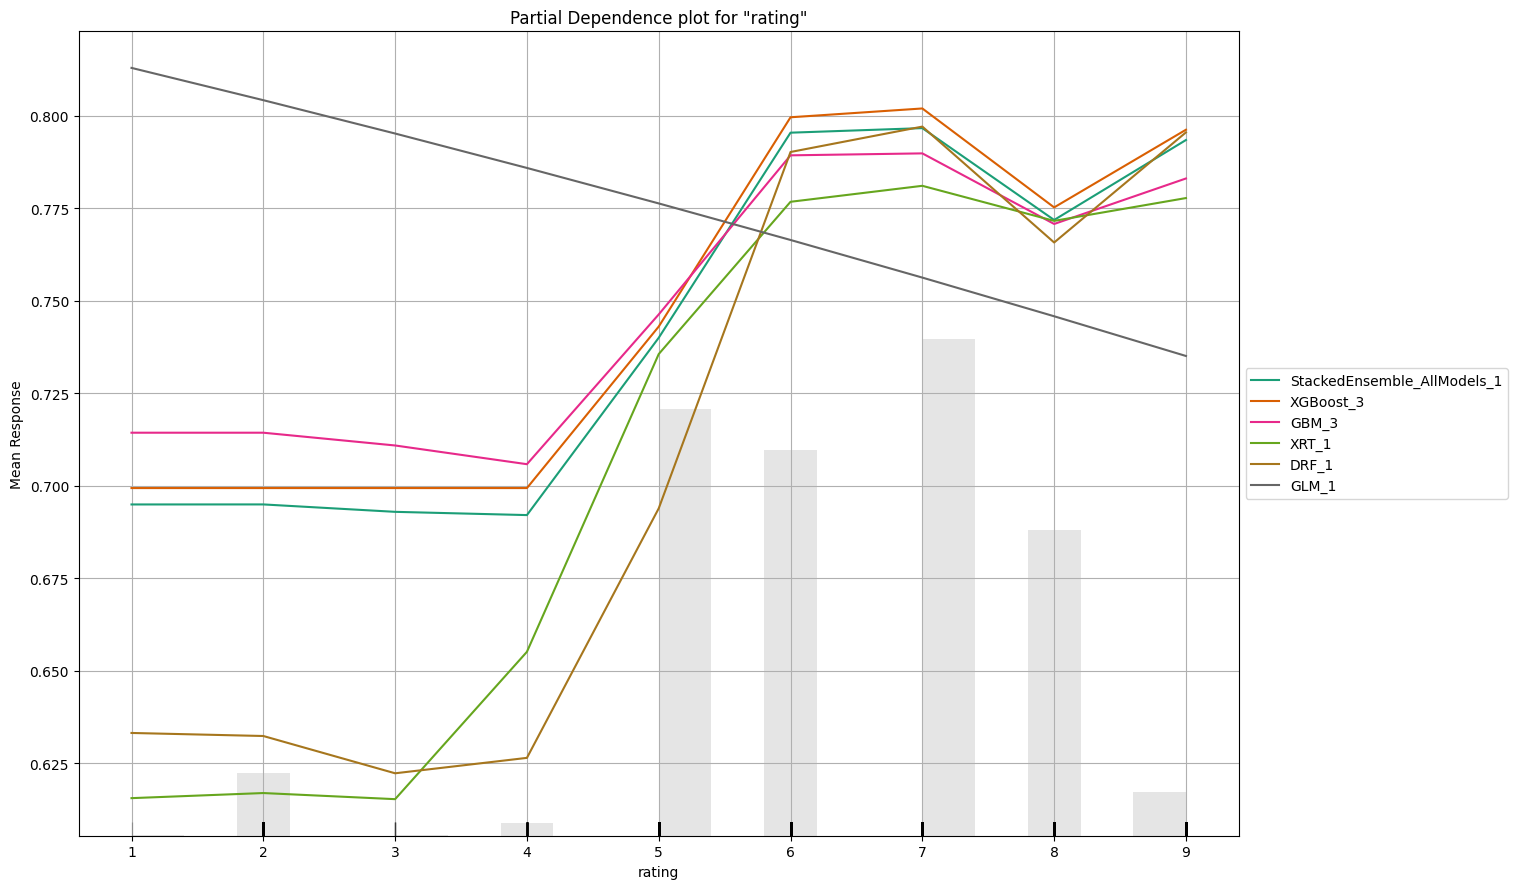

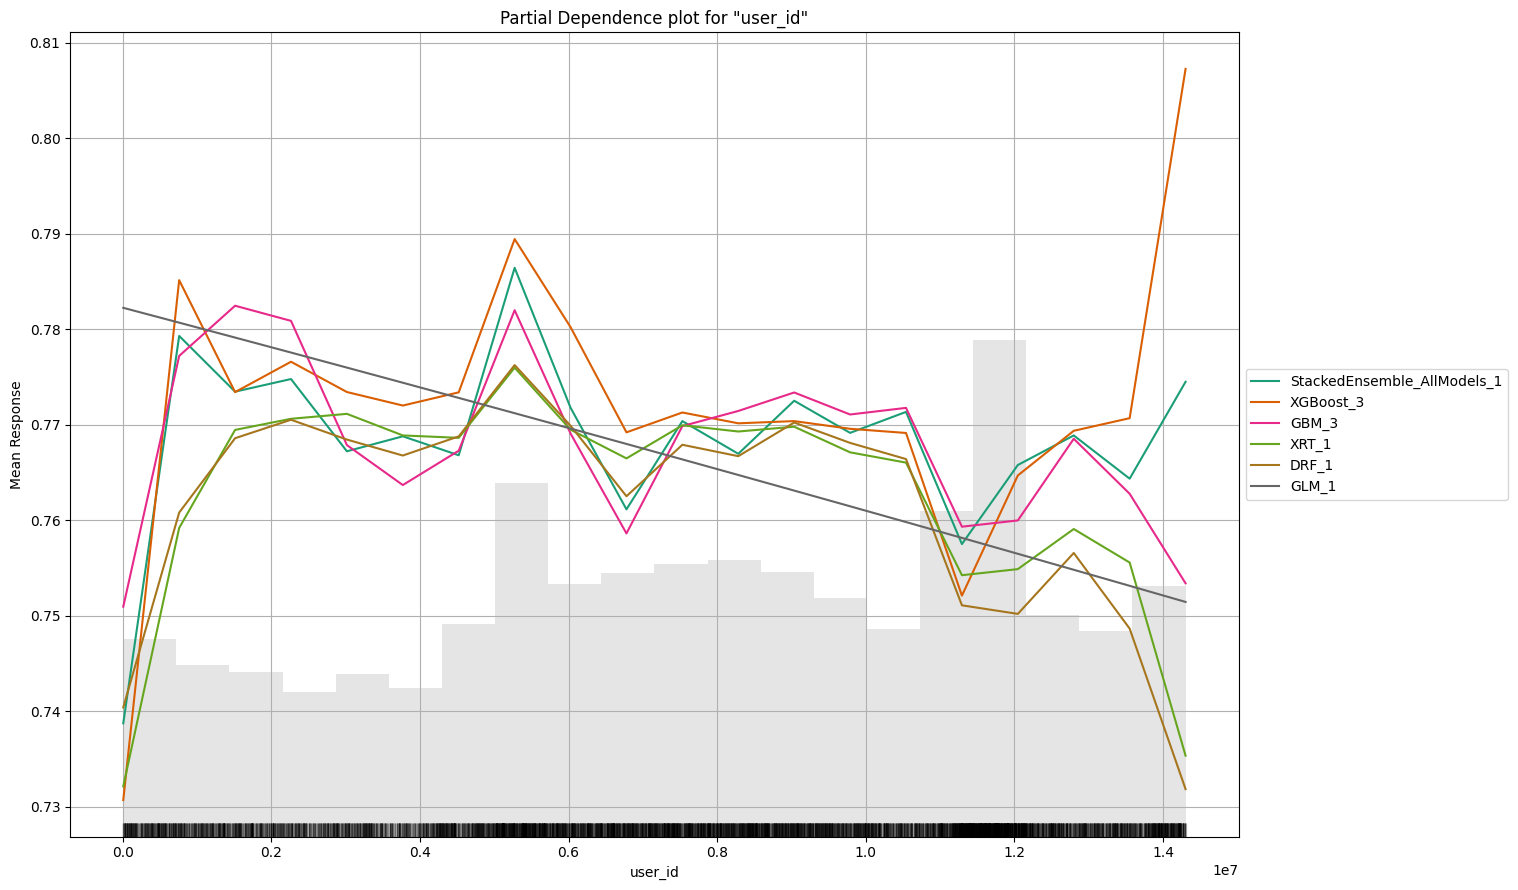

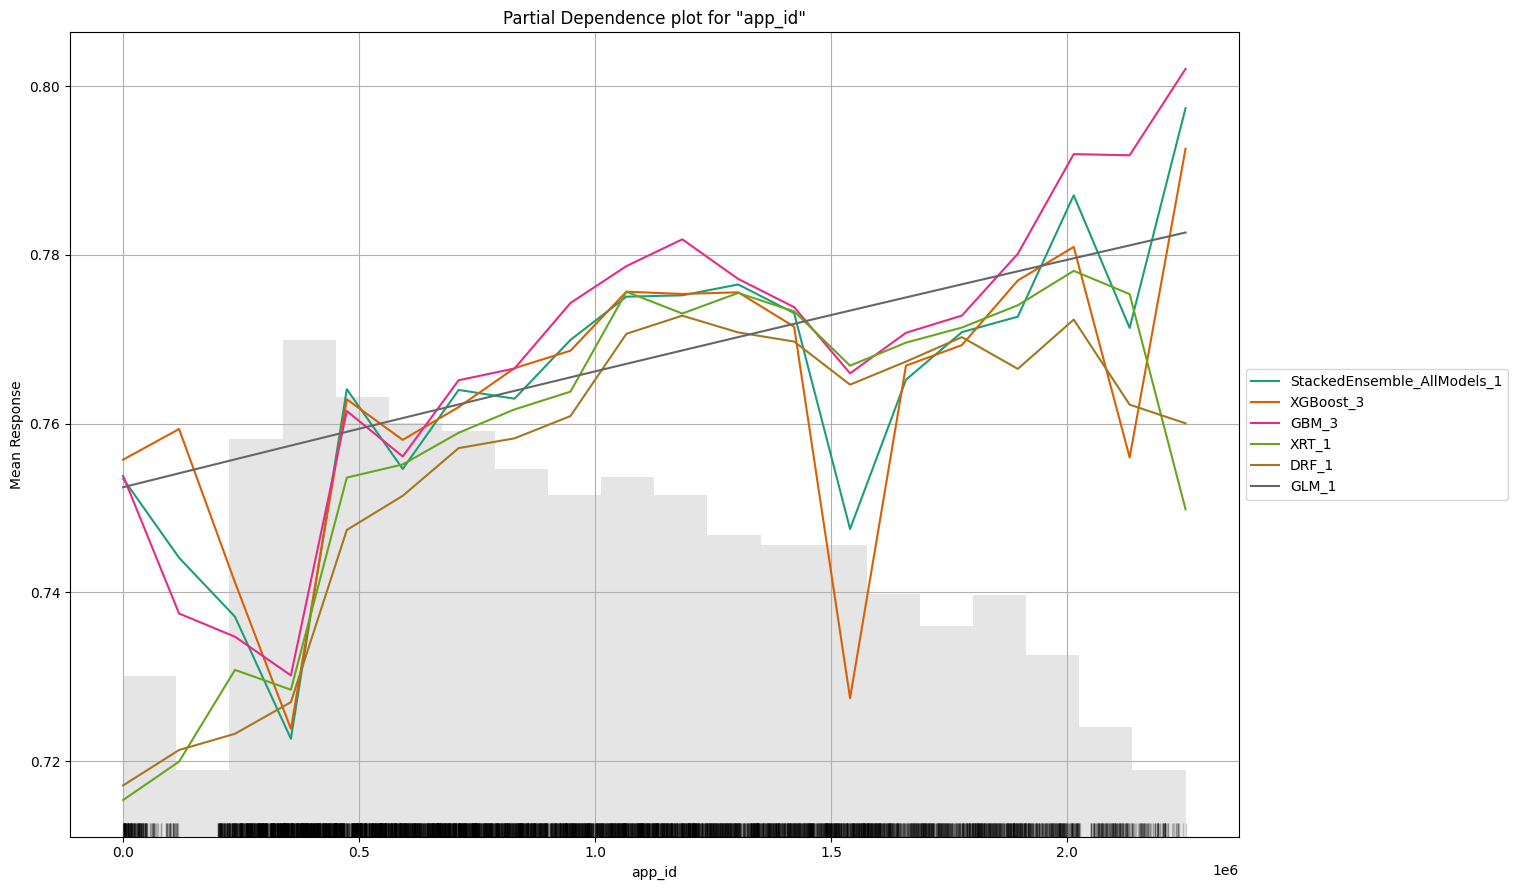

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_1_20240318_05954,0.810871,0.422451,0.928529,0.349165,0.367706,0.135207,18400,0.21445,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20240318_05954,0.808596,0.424468,0.927821,0.349606,0.368841,0.136044,18714,0.112841,StackedEnsemble
GBM_2_AutoML_1_20240318_05954,0.808074,0.424937,0.927927,0.389989,0.369136,0.136261,2358,0.023814,GBM
XGBoost_3_AutoML_1_20240318_05954,0.807466,0.42576,0.926742,0.379405,0.369392,0.13645,1879,0.019119,XGBoost
GBM_1_AutoML_1_20240318_05954,0.804507,0.428001,0.925658,0.379126,0.370569,0.137321,8000,0.03262,GBM
GBM_3_AutoML_1_20240318_05954,0.80323,0.429332,0.925805,0.380022,0.371172,0.137768,2656,0.053423,GBM
GBM_4_AutoML_1_20240318_05954,0.80212,0.430675,0.925685,0.391869,0.371835,0.138262,2521,0.019669,GBM
XGBoost_2_AutoML_1_20240318_05954,0.796622,0.440211,0.922231,0.38812,0.375813,0.141235,2870,0.021296,XGBoost
XRT_1_AutoML_1_20240318_05954,0.794417,0.43661,0.920104,0.414538,0.374227,0.140046,8048,0.065995,DRF
XGBoost_1_AutoML_1_20240318_05954,0.788911,0.448562,0.917681,0.403268,0.378695,0.14341,3888,0.033577,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20240318_05954

,False,True,Error,Rate
False,610.0,1114.0,0.6462,(1114.0/1724.0)
True,296.0,5379.0,0.0522,(296.0/5675.0)
Total,906.0,6493.0,0.1906,(1410.0/7399.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

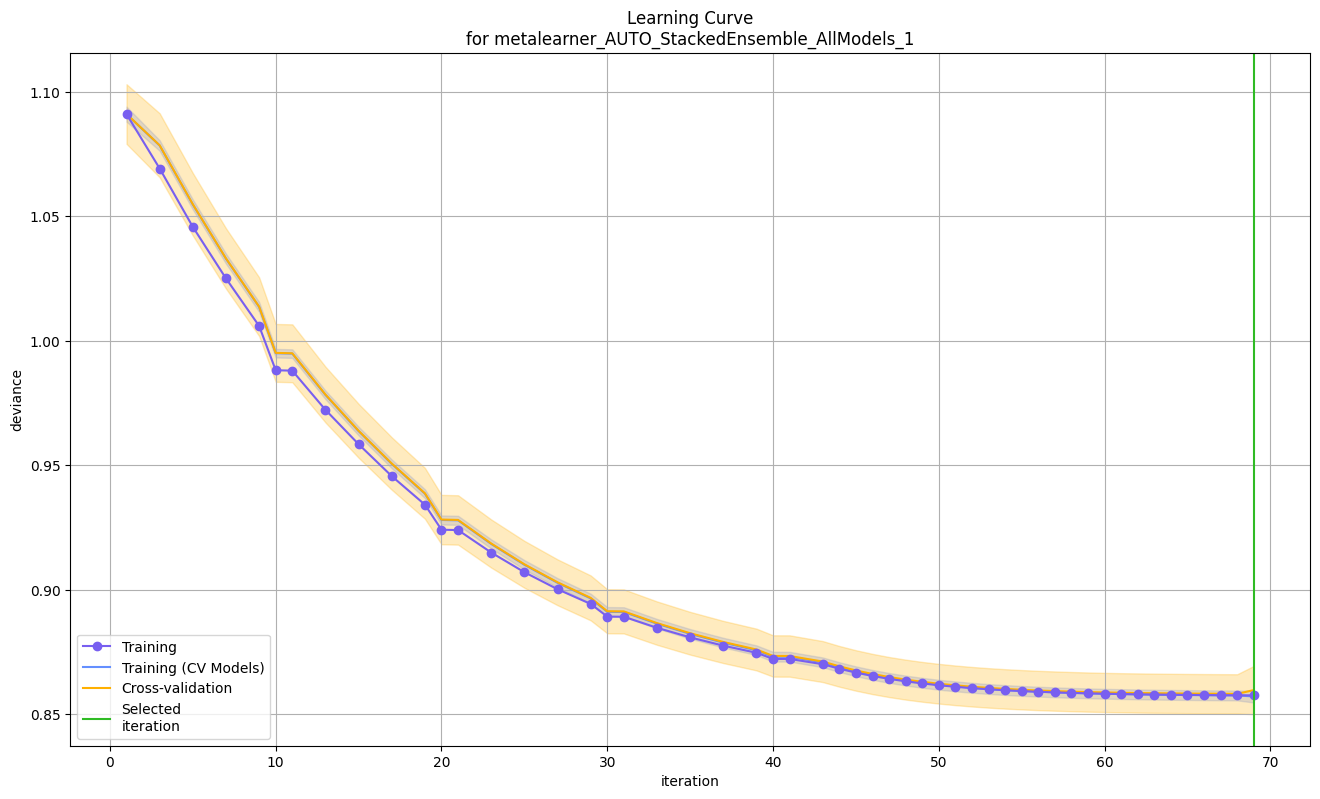

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

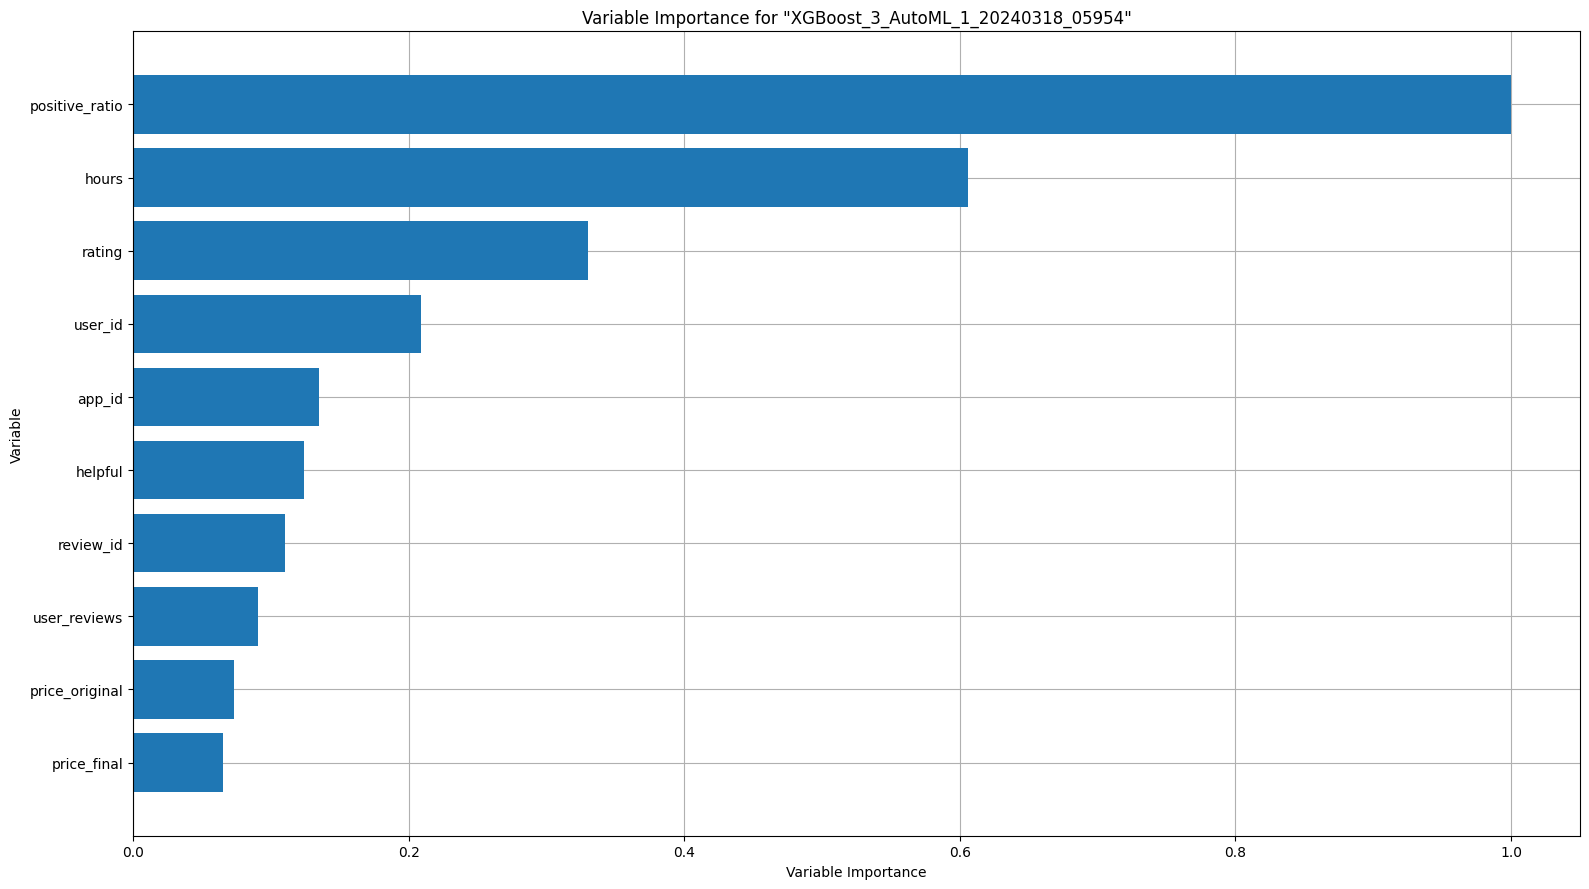

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

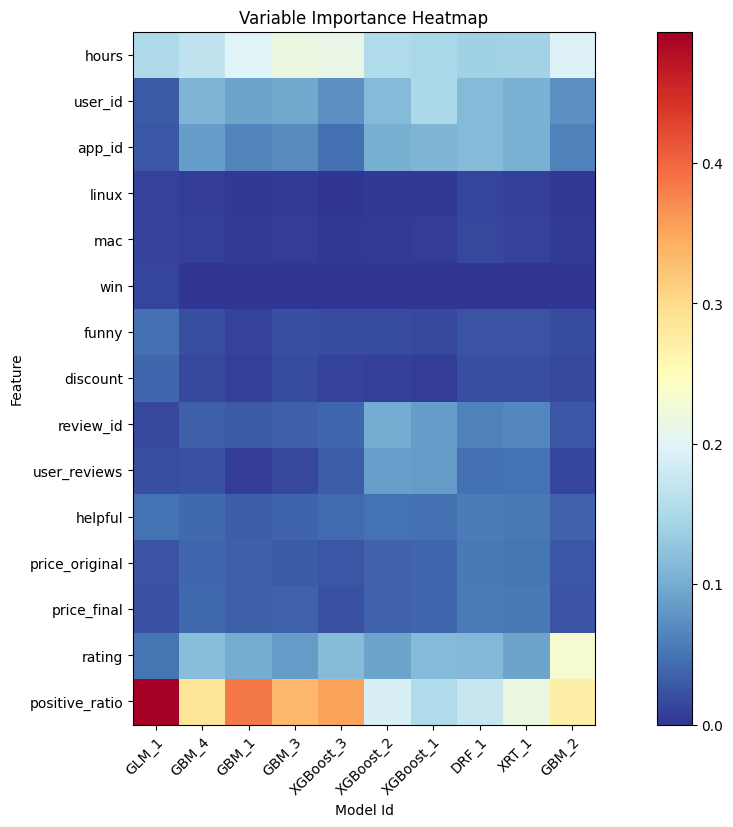

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

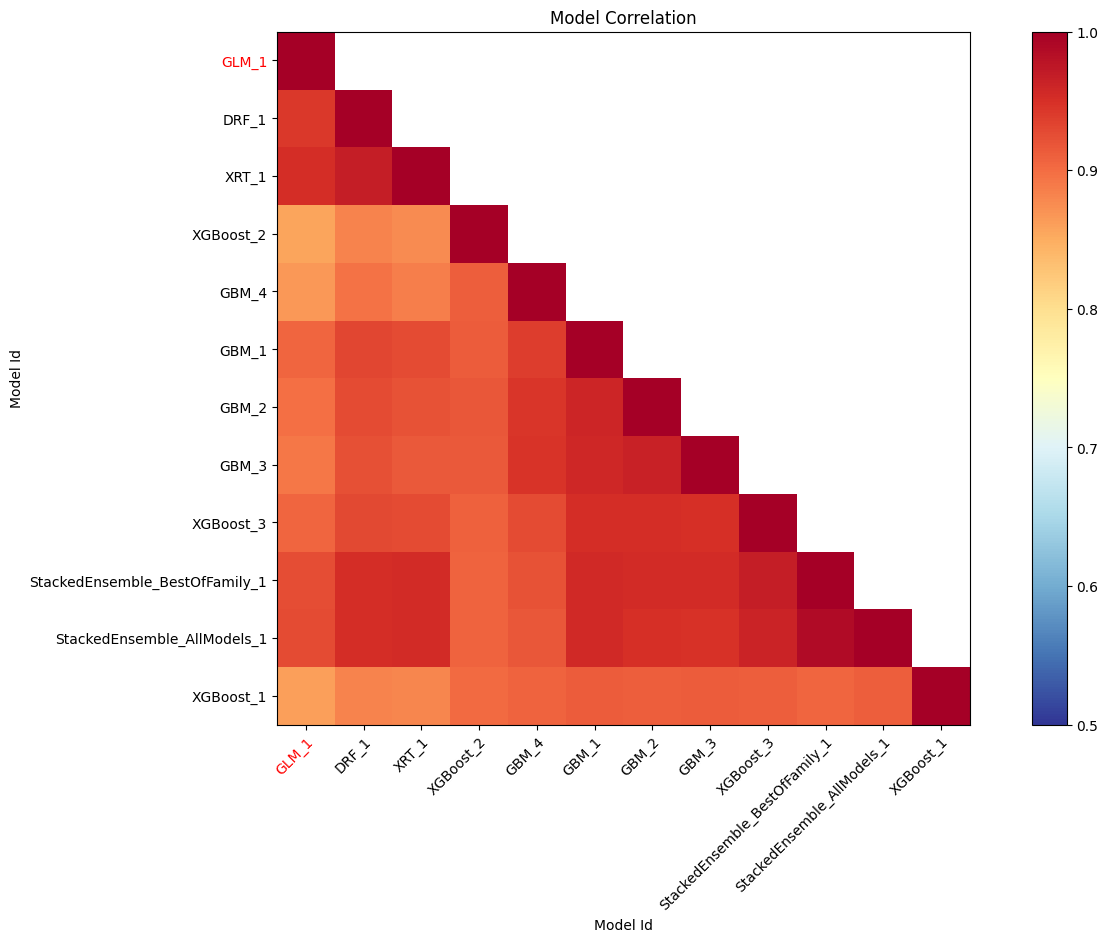

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

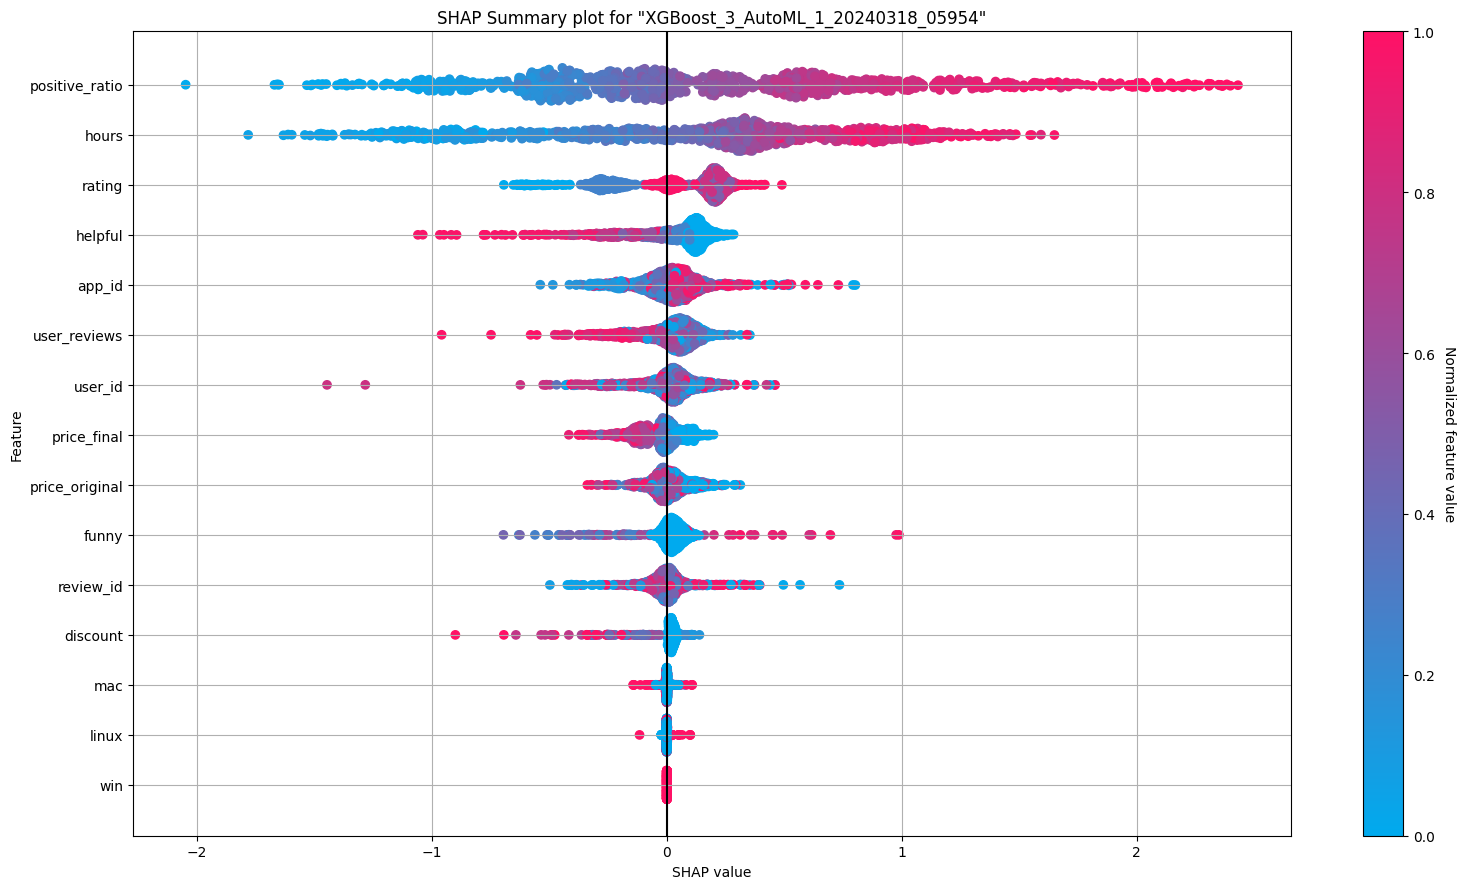

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

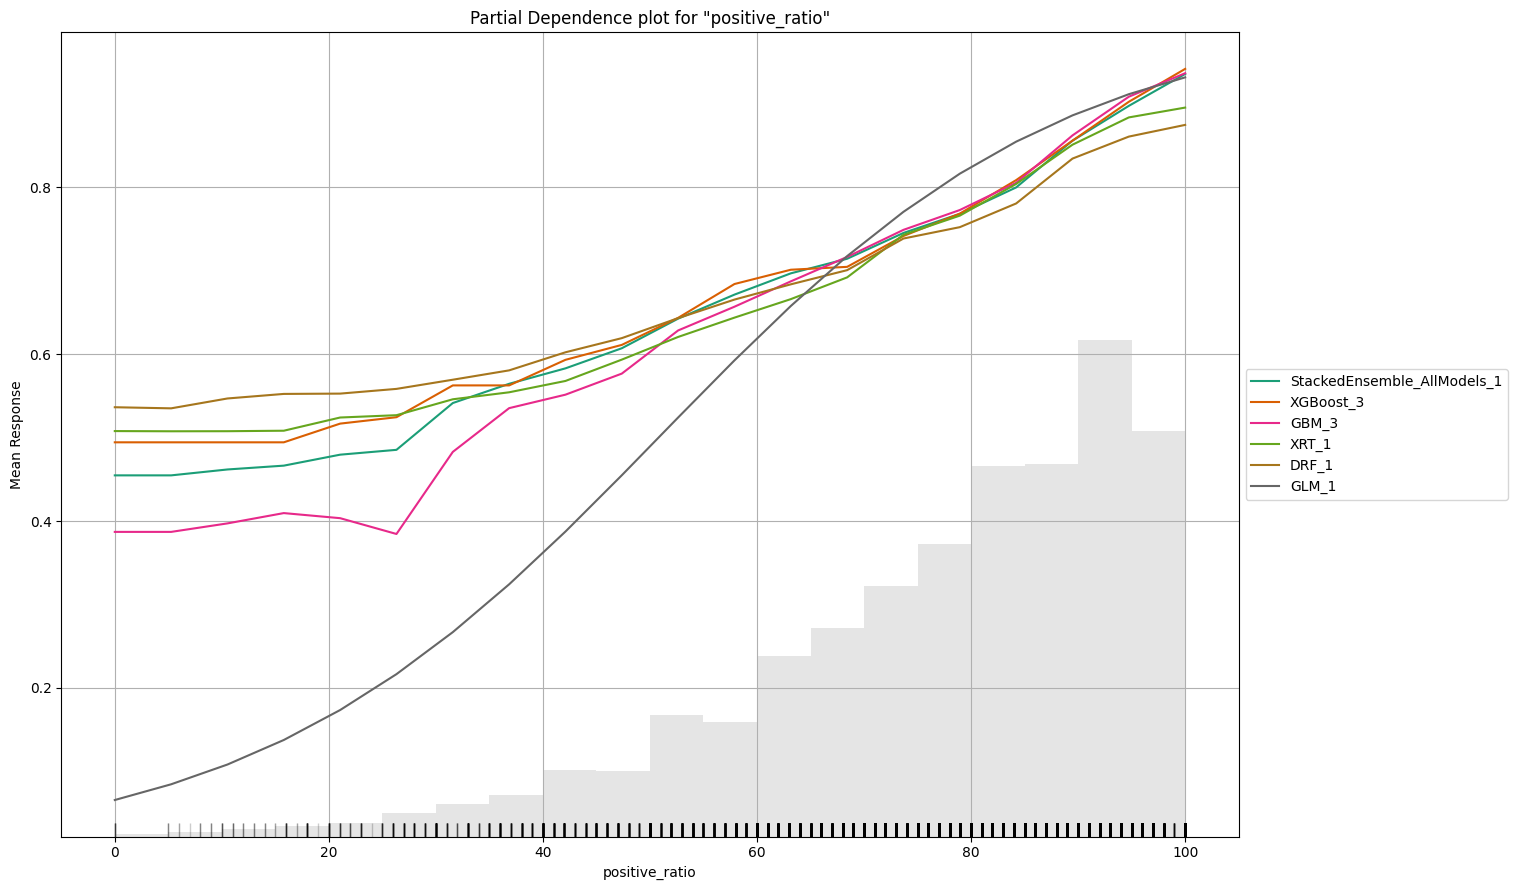

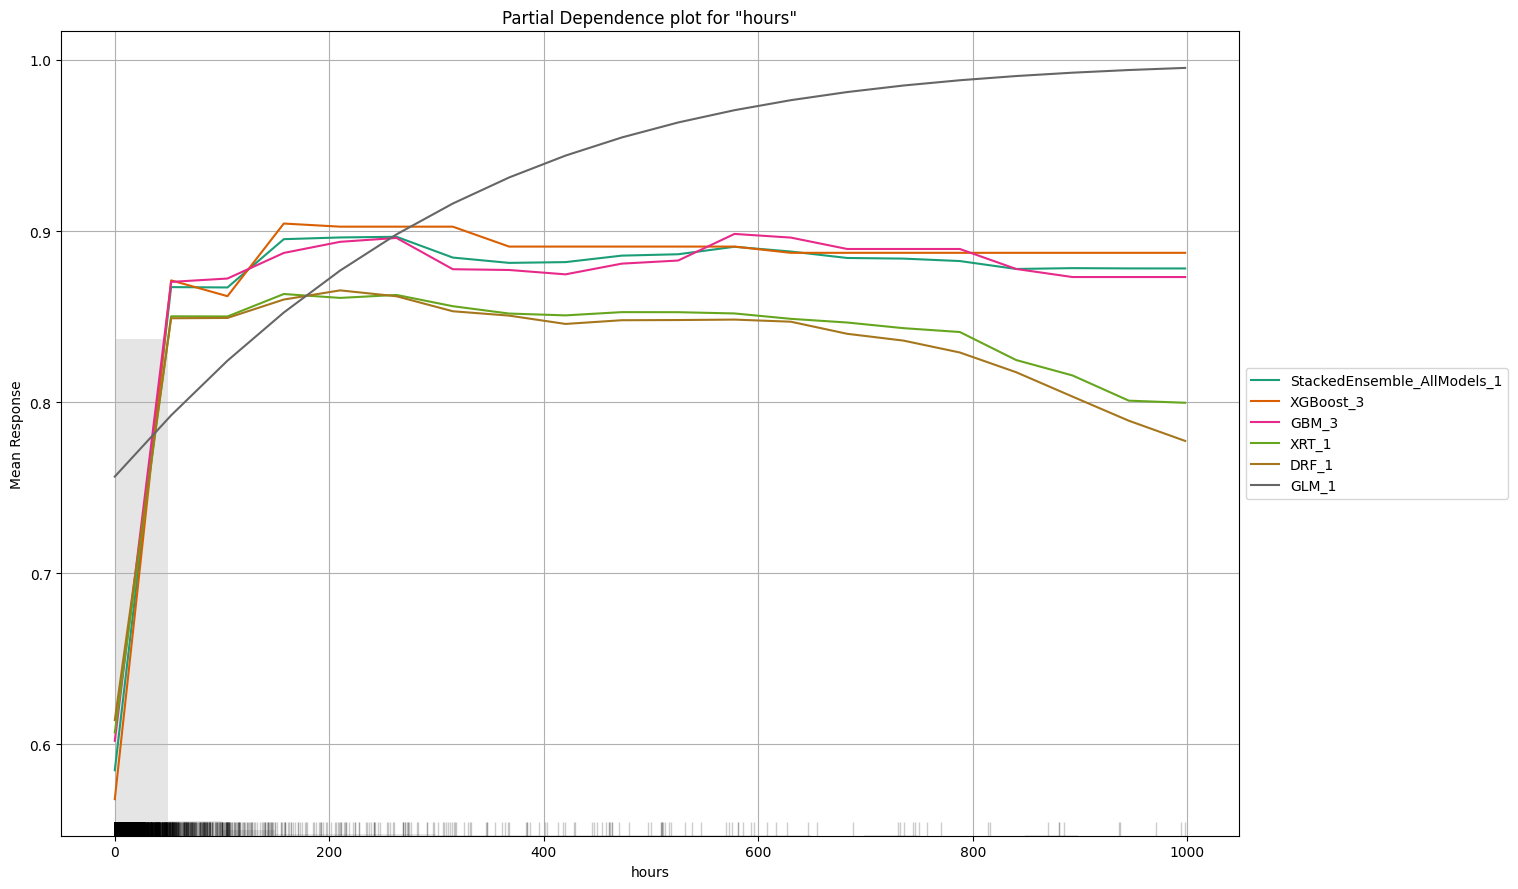

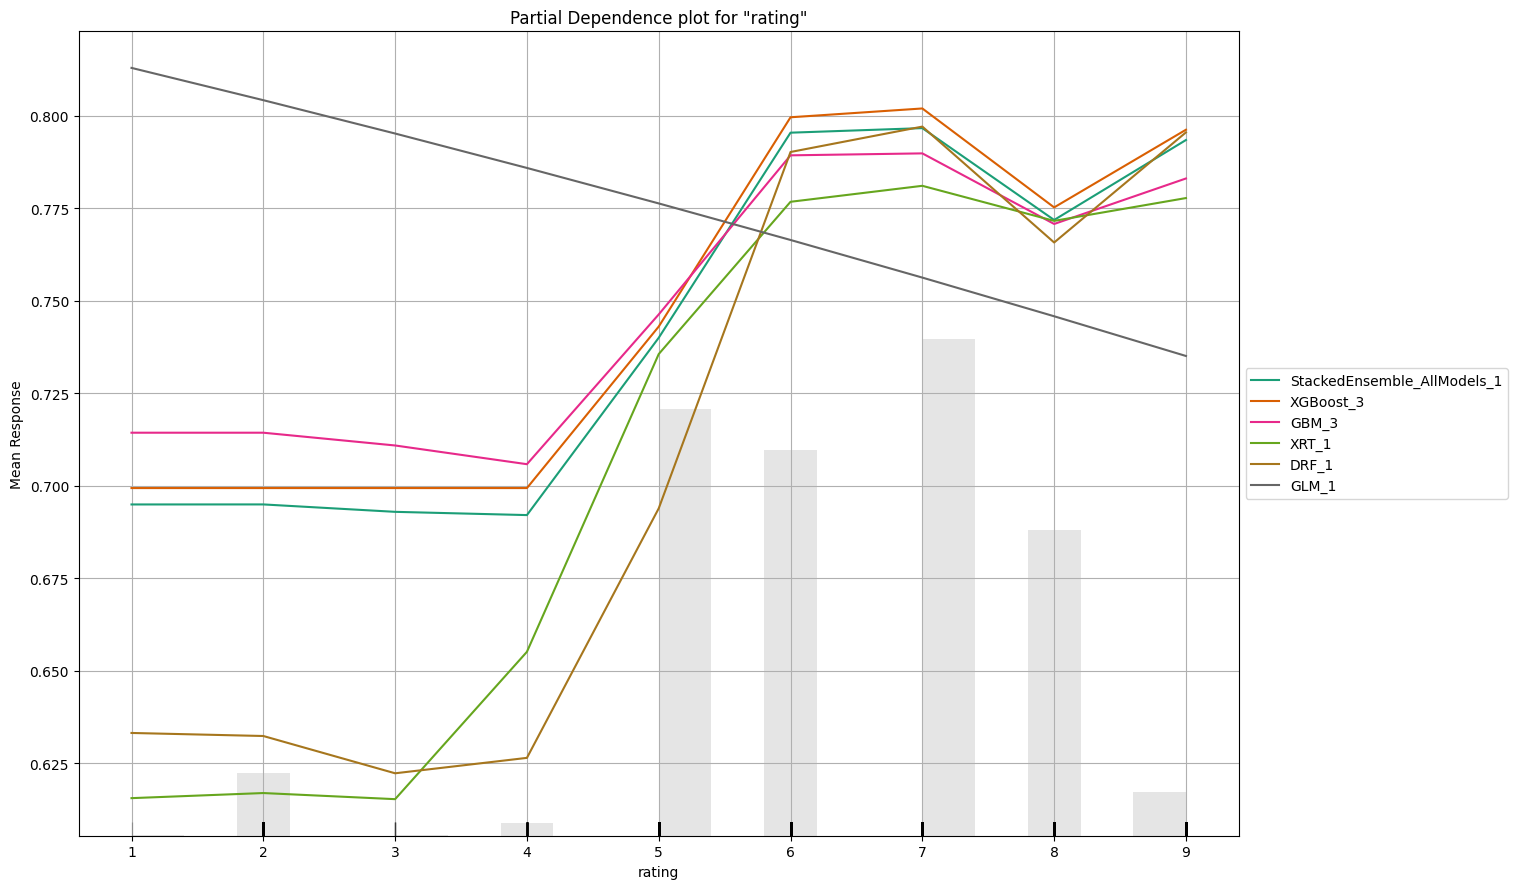

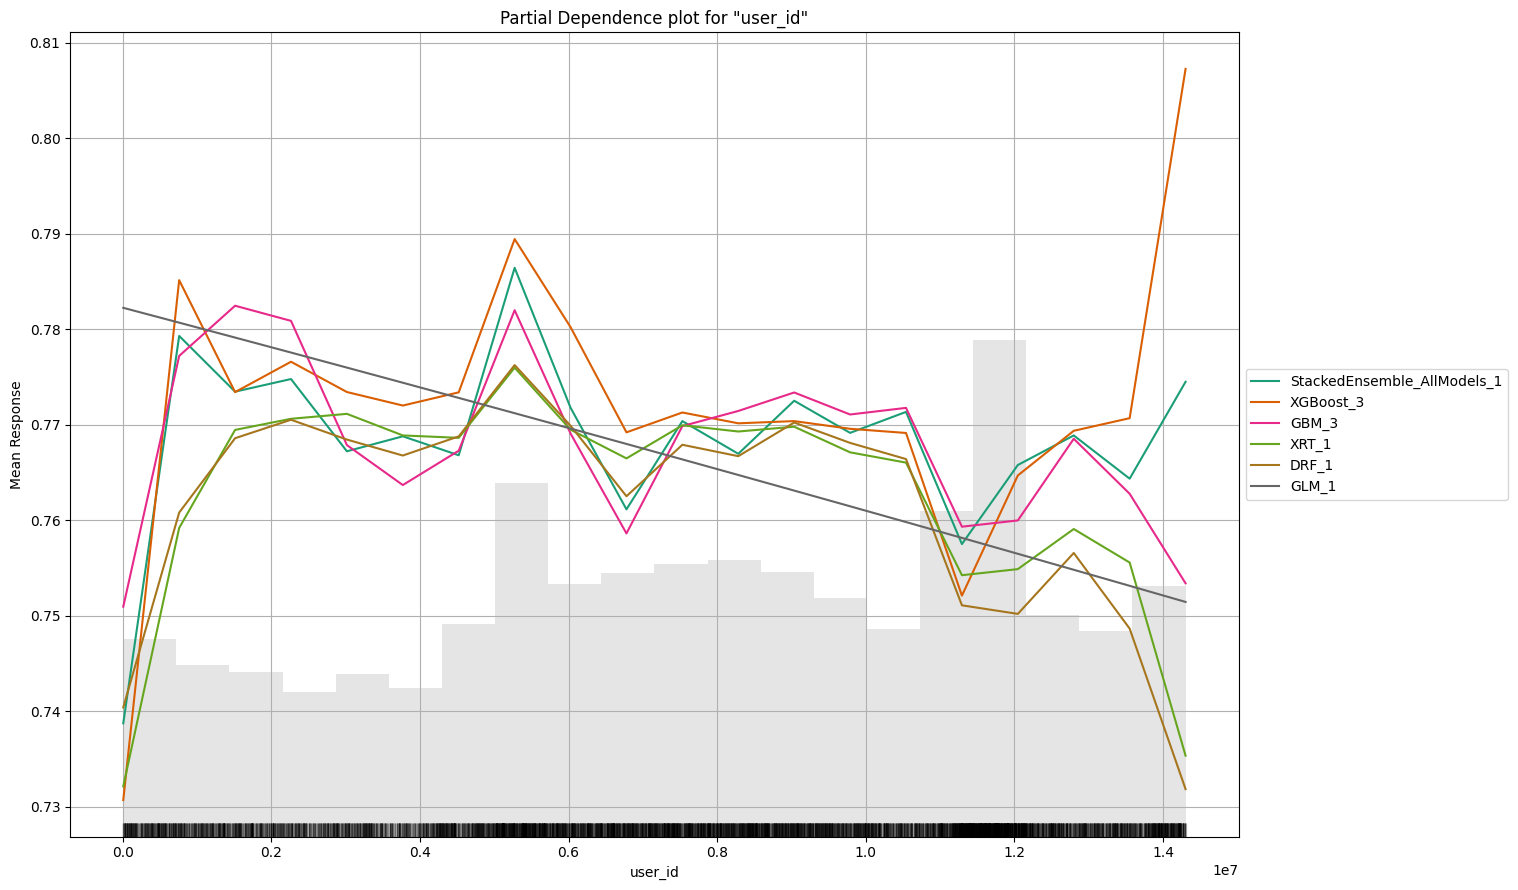

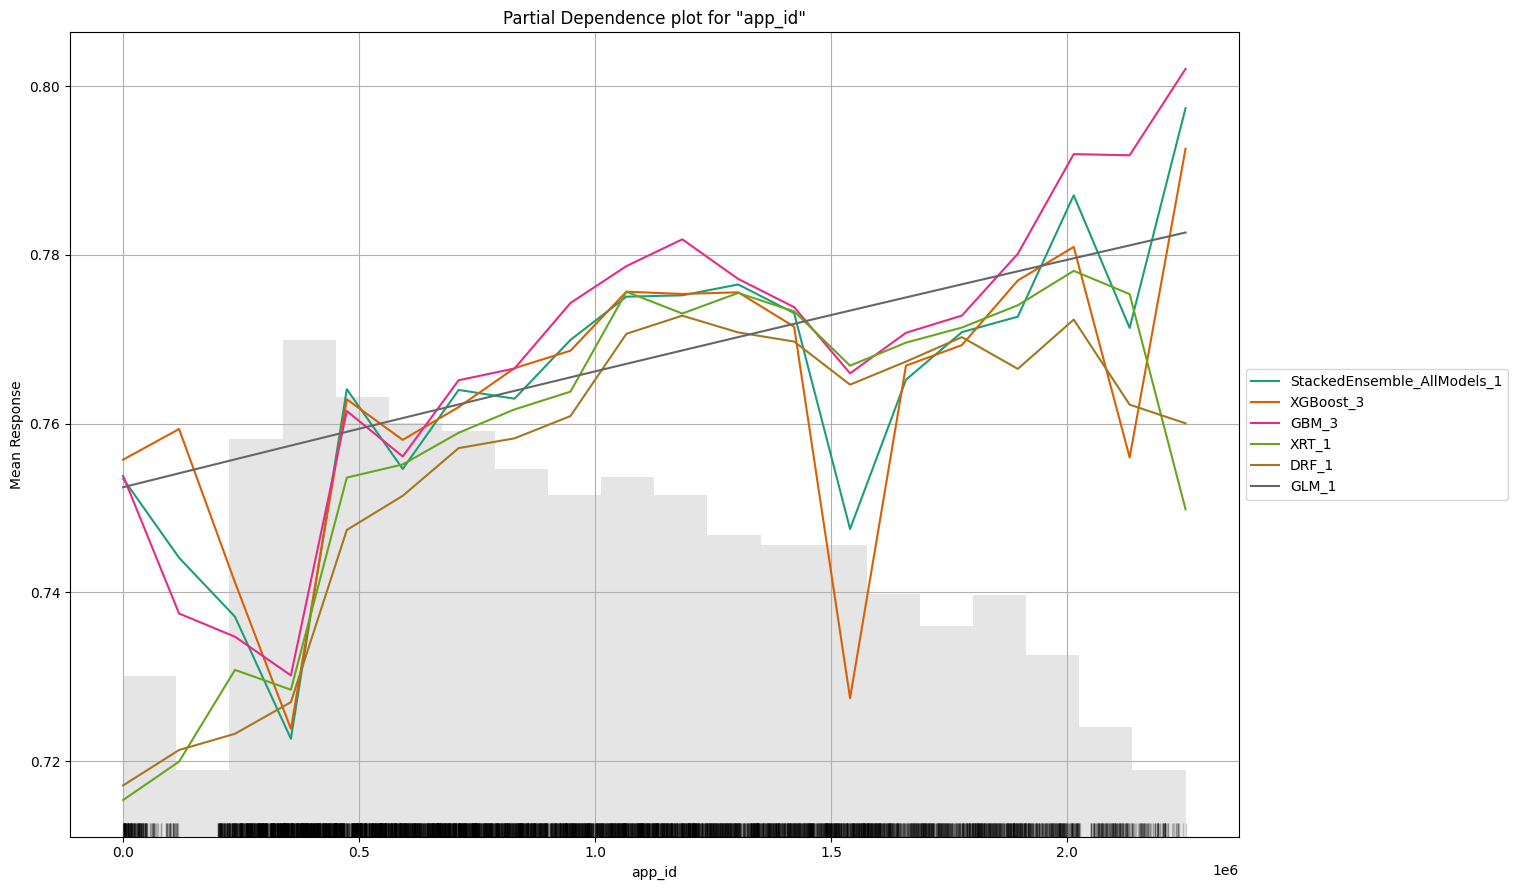

In [28]:
aml.explain(test_h2o)

## Conclusion

From all the models, we can interpret that

**Positive Impacting Features**: the feature  "positive_ratio" has the highest SHAP value, which means it has the strongest positive influence on the model's prediction.

**Negative Impacting Features**: "review_id" has a negative SHAP value,  meaning a higher value of "review_id" would likely decrease the model's output.

## References
1. https://christophm.github.io/interpretable-ml-book/shapley.html#the-shapley-value-in-detail
2. https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Basic%20SHAP%20Interaction%20Value%20Example%20in%20XGBoost.html

License: MIT License

Copyright (c) 2024 Nithish

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.